Next, we'll take a look at how Educational Background and Years of Experience correlate with whether someone is a Hobbyist or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

df = pd.read_csv('./survey_results/2020/survey_results_public.csv')
schema = pd.read_csv('./survey_results/2020/survey_results_schema.csv')

# Create a new column which maps Hobbyist to numerical values, so that aggregate statistics become easier
df['HobbyistNum'] = df['Hobbyist'].replace(to_replace={'Yes': 1, 'No': 0})
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,HobbyistNum
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,1.0
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,0.0
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,1.0
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4,1.0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8,1.0


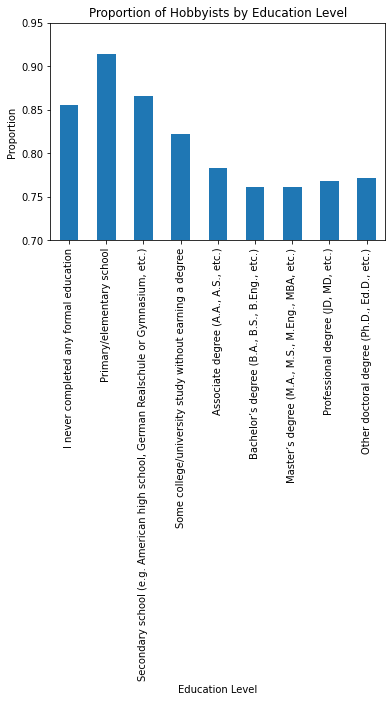

In [5]:
sort_order = [
    'I never completed any formal education',
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Some college/university study without earning a degree',
    'Associate degree (A.A., A.S., etc.)',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)',
    'Other doctoral degree (Ph.D., Ed.D., etc.)',
]
df[['EdLevel','HobbyistNum']].groupby('EdLevel').mean().reindex(sort_order).plot(legend=False, kind='bar', ylabel='Proportion', xlabel='Education Level', ylim=(0.7, 0.95), title='Proportion of Hobbyists by Education Level');

We can see above that overall the proportion of Hobbyists is reasonably high, with all groups coming in at over 75%. There is however a noticeable decrease in Hobbyists in those which have degree level education versus those that don't.

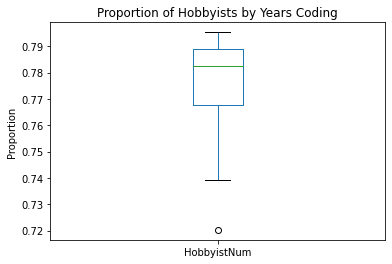

In [7]:
df = df.replace({'YearsCode':{'Less than 1 year': 0, 'More than 50 years': 51}})
df['YearsCode'] = df['YearsCode'].astype(float)
df['YearsCodeBin'], bins = pd.cut(df['YearsCode'], bins=list(range(0,56,5)), retbins=True)
years_code_df = df[['YearsCodeBin','HobbyistNum']].copy().groupby('YearsCodeBin').mean().sort_index()
years_code_df.index.categories = bins[:-1]
years_code_df.plot(kind='box')
plt.title('Proportion of Hobbyists by Years Coding')
plt.xlabel('')
plt.ylabel('Proportion');

We can see that the data has a very tight spread of only about 7%. This shows that being a hobbyist does seem to correlate with years of experience either.

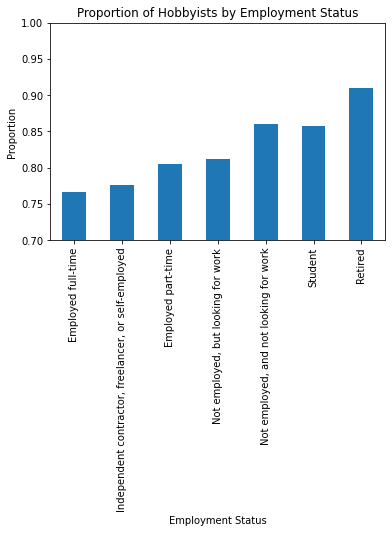

In [4]:
df[['Employment']].value_counts()
sort_order = [                                      
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed',
    'Employed part-time',
    'Not employed, but looking for work',
    'Not employed, and not looking for work',
    'Student',
    'Retired',
]
df[['Employment','HobbyistNum']].groupby('Employment').mean().reindex(sort_order).plot(kind='bar', legend=False, rot=90, ylim=(0.7,1.0), title='Proportion of Hobbyists by Employment Status', xlabel='Employment Status', ylabel='Proportion');

There is a very slight, but noticeable trend that as people become "less employed" they code as a hobby more